# Preprocessing Layers in TensorFlow Keras

**Install Libraries**

In [3]:
!pip install scikit-image

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 811.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.7 MB 8.3 MB/s eta 0:00:02
   ---------------------------------------- 0.1/12.7 MB 8.3 MB/s eta 0:00:02
   ---------------------------------------- 0.1/12.7 MB 8.3 MB/s eta 0:00:02
   ---------------------------------------- 0.1/12.7 MB 8.3 MB/s eta 0:00:02
   ---------------------------------------- 0.1/12.7 MB 8.3 MB/s eta 0:00:02
   ---------------------------------------- 0.1/12.7 MB 8.3 MB/s eta 0:00:02
   ---------------------------------------- 0.1/12.7 MB 8.3 MB/s eta 0:00:02
   ---------------------------------------- 0.1/12.7 MB 8.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/12.7 MB 2.1 MB/s eta 0:00:06
   --

In [5]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 2.3 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/10.6 MB 11.9 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.6 MB 13.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.7/10.6 MB 15.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.5/10.6 MB 15.9 MB/s eta 0:00:01
   ---------------- ----------------------- 4.4/10.6 MB 16.5 MB/s eta 0:00:01
   ------------------- -------------------- 5.0/10.6 MB 16.1 MB/s eta 0:00:01
   ---------------------- ----------------- 6.0/10.6 MB 16.7 MB/s eta 0:00:01
   ----------------------- ---------------- 6.1/10.6 MB 17.1 MB/s eta 0:00:01
   ----------------------- ---------------- 6.1/10.6 MB 17.1 MB/s eta 0:00:01
   ----------------------- ---------------- 6.1/10.6 MB 17.1 MB/s eta 0:00:01
   ----------------------- ---------------- 6.1/10.6 MB 17.1 MB/s eta 0:0

**Import Libraries**

In [17]:
import pandas as pd
import numpy as np
import cv2
from skimage.io import imread, imshow
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Load Training Dataset**

In [8]:
data=pd.read_csv('Emergency_Vehicles/train.csv')
data.head()
x=[]
for i in data.image_names:
    img=cv2.imread('Emergency_Vehicles/train/'+i)
    x.append(img)
x=np.array(x)
y=data['emergency_or_not']

**Preprocess Dataset**

In [9]:
target_size = (224, 224)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=.1),
    tf.keras.layers.RandomRotation(factor=0.2),
    tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    tf.keras.layers.RandomContrast(factor=0.2)
])

**Define Model Architecture**

In [10]:
model = Sequential([
    Input(shape=(target_size[0], target_size[1], 3)),  # Define input shape
    Resizing(*target_size),
    Rescaling(1./255),
    data_augmentation,
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

**Compile Model**

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Display Model Summary**

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

**Train Model**

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=45,test_size=0.3,shuffle=True,stratify=y)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 36s 917ms/step - accuracy: 0.5548 - loss: 1.2602 - val_accuracy: 0.7004 - val_loss: 0.6094
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 35s 966ms/step - accuracy: 0.6542 - loss: 0.6237 - val_accuracy: 0.7247 - val_loss: 0.5672
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - accuracy: 0.6698 - loss: 0.6034 - val_accuracy: 0.7045 - val_loss: 0.5413
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 443ms/step - accuracy: 0.7109 - loss: 0.5812 - val_accuracy: 0.7308 - val_loss: 0.5312
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 461ms/step - accuracy: 0.6897 - loss: 0.5674 - val_accuracy: 0.7186 - val_loss: 0.5606
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 461ms/step - accuracy: 0.7336 - loss: 0.5424 - val_accuracy: 0.7287 - val_loss: 0.5669
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 28s 786ms/step - accuracy: 0.7232 - loss: 0.5615 - val_accuracy: 0.7247 - val_loss: 0.5451
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 460ms/step - accuracy: 0.7624 - loss: 0.5175 - val_accu

**Load Test Dataset**

In [15]:
data=pd.read_csv('Emergency_Vehicles/test.csv')
x_test=[]
for i in data.image_names:
    img=cv2.imread('Emergency_Vehicles/test/'+i)
    x_test.append(img)
x_test=np.array(x_test)

**Classify Test Dataset Images**

In [16]:
y_preds=model.predict(x_test)
y_predictions = [1 if x > 0.5 else 0 for x in y_preds]

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step


**Plot Images with Predicted Labels**

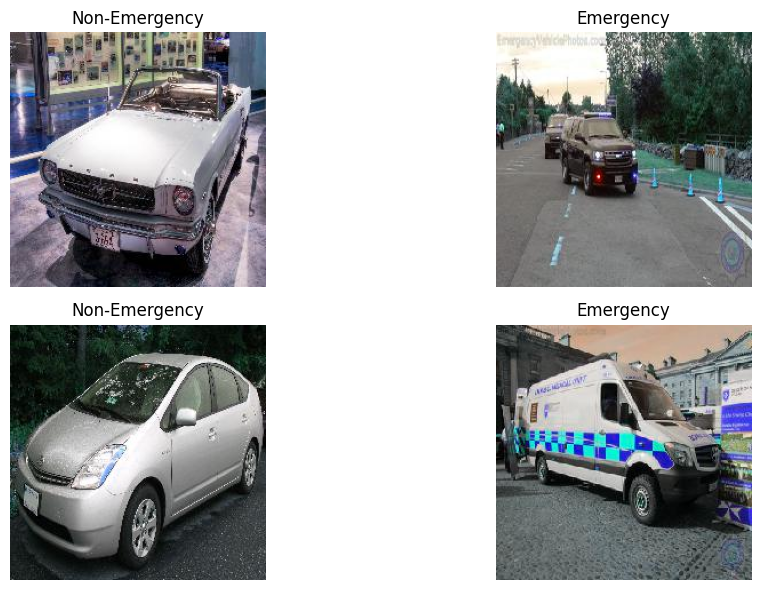

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[i])
    if y_predictions[i]==1:
        ax.set_title(f"Emergency") 
    else:
        ax.set_title(f"Non-Emergency") 
    ax.axis('off')  
plt.tight_layout() 
plt.show()